In [97]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### PROVA 1

Nome: Miguel Antônio Ribeiro e Silva
4680

In [98]:
df = pd.read_csv('paises-prova-2023.csv')
df

,Unnamed: 0,pais,regiao,populacao,area,densidade_populacional,area_costeira,migracao,mortalidade_infantil_por_1000,GDP,...,telefone_por_1000,terra_plantavel,cultivo,outro,clima,taxa_natalidade,taxa_mortalidade,agricultura,industria,servico
0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [99]:
# 01

df['regiao'].unique()
df['pais'].unique()

qtd_paises = len(df['pais'].unique())
qtd_regioes = len(df['regiao'].unique())

print(f'Quantidade de paises: {qtd_paises}')
print(f'Quantidade de regioes: {qtd_regioes}')

Quantidade de paises: 227
Quantidade de regioes: 11


In [100]:
# 02

mortalidade_media = df.groupby('regiao')['mortalidade_infantil_por_1000'].mean()
mortalidade_media = mortalidade_media.sort_values() # Ordenando do menor para o maior
mortalidade_media.head(1)

regiao
WESTERN EUROPE    4.730357
Name: mortalidade_infantil_por_1000, dtype: float64

In [101]:
# 03

paises_populacao = df.groupby('pais')['populacao'].sum()
paises_populacao = paises_populacao.sort_values()
print("MENOR VALOR: ", paises_populacao.head(1))
print("\nMAIOR VALOR: ", paises_populacao.tail(1))

MENOR VALOR:  pais
St Pierre & Miquelon    7026
Name: populacao, dtype: int64

MAIOR VALOR:  pais
China    1313973713
Name: populacao, dtype: int64


regiao
ASIA (EX. NEAR EAST)    28
BALTICS                  3
C.W. OF IND. STATES     12
EASTERN EUROPE          12
LATIN AMER. & CARIB     45
NEAR EAST               16
NORTHERN AFRICA          6
NORTHERN AMERICA         5
OCEANIA                 21
SUB-SAHARAN AFRICA      51
WESTERN EUROPE          28
Name: pais, dtype: int64

<Axes: xlabel='regiao'>

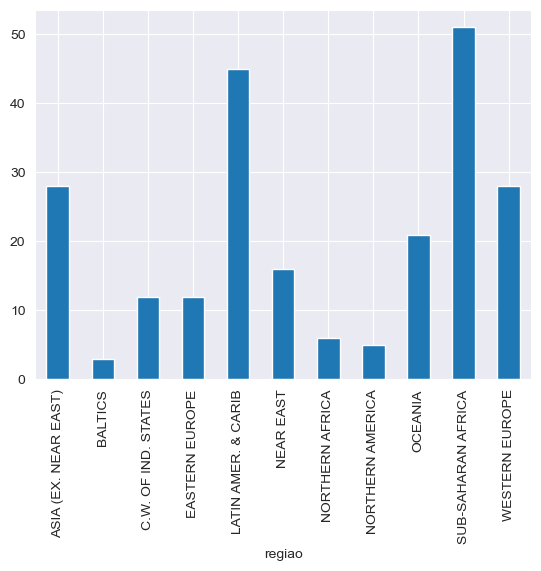

In [22]:
# 04

paises_regiao = df.groupby('regiao')['pais'].count() # Quantidade de paises agrupada por regiao
paises_regiao_grafico = paises_regiao.plot.bar() # Criando o grafico
display(paises_regiao)
display(paises_regiao_grafico)

In [106]:
# 05

#90 percentil
paises_gdp = df.groupby('pais')['GDP'].sum()
percentil_90 = np.percentile(paises_gdp, 90)
print(f'90º percentil do gdp dos paises: {percentil_90}')

#GDP Brazil
brazil_gdp = paises_gdp['Brazil']

#Percentil de todos
percentis = np.arange(0, 101, 1)
percentis_gdp = np.percentile(paises_gdp, percentis)

print(f'GDP do Brasil: {brazil_gdp}')

#Percentil Brazil
for i in range(len(percentis_gdp)):
    if percentis_gdp[i] <= brazil_gdp <= percentis_gdp[i + 1]:
        print(f'Brasil esta entre o {percentis[i]}º e o {percentis[i+1]}º percentil, ou seja, está no 59º')
        break


90º percentil do gdp dos paises: 26880.0
GDP do Brasil: 7600.0
Brasil esta entre o 59º e o 60º percentil, ou seja, está no 59º


In [110]:
# 06

mortalidade_infantil = df['mortalidade_infantil_por_1000']
taxa_natalidade = df['taxa_natalidade']

# Media das amostras
mortalidade_infantil_mean = mortalidade_infantil.mean()
taxa_natalidade_mean = taxa_natalidade.mean()
print("Mortalidade infantil: ", mortalidade_infantil_mean)
print("Taxa de natalidade: ", taxa_natalidade_mean)
print("\n")

# Erro padrao, zscore e valor p
erro_mi = mortalidade_infantil.std() / np.sqrt(len(mortalidade_infantil))
z_score_mi = abs(22 - mortalidade_infantil_mean)/erro_mi
valor_p_mi = 2*st.norm.sf(abs(z_score_mi))
print("Erro padrao da mortalidade infantil: ", erro_mi)
print("Zscore: ", z_score_mi)
print("Valor p: ", valor_p_mi)
print("\n")

erro_tn = taxa_natalidade.std() / np.sqrt(len(taxa_natalidade))
z_score_tn = abs(22 - taxa_natalidade_mean)/erro_tn
valor_p_tn = 2*st.norm.sf(abs(z_score_tn))
print("Erro padrao da taxa de natalidade: ", erro_tn)
print("Zscore: ", z_score_tn)
print("Valor p: ", valor_p_tn)

print("\n")
print("RESPOSTA: 22 é mais provavel que veio pela taxa de natalidade, até mesmo pela média ser mais próxima de 22 e o valor p ser menor")


Mortalidade infantil:  35.50696428571428
Taxa de natalidade:  22.114732142857147


Erro padrao da mortalidade infantil:  2.3489100810564647
Zscore:  5.750311344246639
Valor p:  8.907925346106788e-09


Erro padrao da taxa de natalidade:  0.7418246759600745
Zscore:  0.15466207390399828
Valor p:  0.8770877307856171


RESPOSTA: 22 é mais provavel que veio pela taxa de natalidade, até mesmo pela média ser mais próxima de 22 e o valor p ser menor


In [111]:
# 07

#H0 - SAO IGUAIS
#H1 - SAO DIFERENTES

#TESTE T

media_paises_latim = df[df['regiao'] == 'LATIN AMER. & CARIB']['populacao'].mean()
media_paises_african = df[df['regiao'] == 'SUB-SAHARAN AFRICA']['populacao'].mean()
std_african = df[df['regiao'] == 'LATIN AMER. & CARIB']['populacao'].std()
std_latin = df[df['regiao'] == 'SUB-SAHARAN AFRICA']['populacao'].std()
len_latin = len(df[df['regiao'] == 'LATIN AMER. & CARIB']['populacao'])
len_african = len(df[df['regiao'] == 'SUB-SAHARAN AFRICA']['populacao'])
se_diff = np.sqrt((std_african**2/len_african) + (std_latin**2/len_latin)) # Raiz da soma das variâncias / pela quantidade
t_score = (media_paises_latim - media_paises_african)/se_diff
print("T SCORE: ",t_score)

#VALOR P
graus = len_latin + len_african - 2
p = 2 * (1 - st.t.cdf(abs(t_score), df=graus))
print("VALOR P: ",p)

alpha = 0.05

if p < alpha:
    print("Rejeita H0: As medias são diferentes")
else:
    print("Aceita H0: não há evidências suficientes de que as médias são diferentes")

T SCORE:  -0.3883827210778068
VALOR P:  0.6986110679389141
Aceita H0: não há evidências suficientes de que as médias são diferentes


,pais,populacao,area
64,Estonia,1324333,45226
114,Latvia,2274735,64589
120,Lithuania,3585906,65200


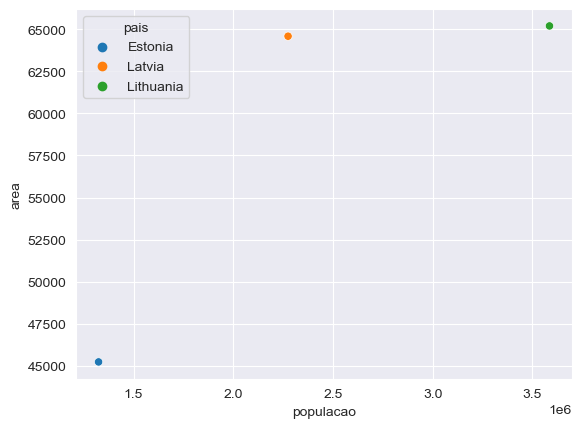

In [112]:
# 08
paises_baltics = df[df['regiao'] == 'BALTICS']['pais']
pop_area = df[df['pais'].isin(paises_baltics)][['pais', 'populacao', 'area']]
display(pop_area)
scatter_graph = sns.scatterplot(data=pop_area, x='populacao', y='area', hue='pais')
plt.show()

<Axes: xlabel='regiao'>

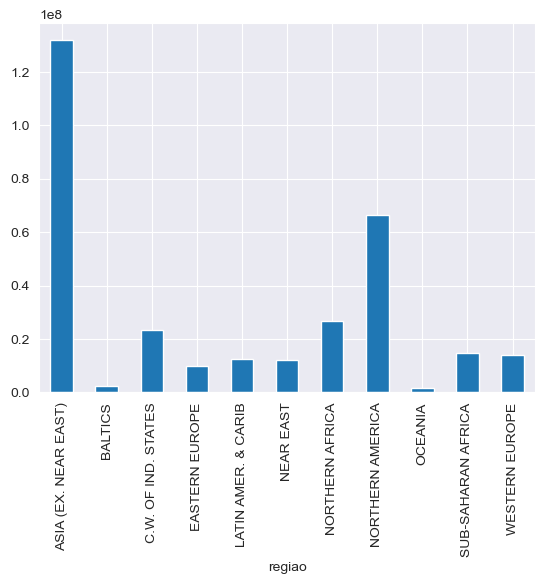

In [114]:
# 09

mediapop_regioes = df.groupby('regiao')['populacao'].mean()
mediapop_regioes.plot.bar()